<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Matrix-vector-multiplication" data-toc-modified-id="Matrix-vector-multiplication-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matrix-vector multiplication</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Write-a-function-that-uses-for-loops-to-multiply-a-matrix-and-a-vector." data-toc-modified-id="Exercise:-Write-a-function-that-uses-for-loops-to-multiply-a-matrix-and-a-vector.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise: Write a function that uses for loops to multiply a matrix and a vector.</a></span></li><li><span><a href="#Exercise:-Create-your-own-Vandermonde-matrix" data-toc-modified-id="Exercise:-Create-your-own-Vandermonde-matrix-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercise: Create your own Vandermonde matrix</a></span></li></ul></li><li><span><a href="#Norms,-inner-products,-and-orthogonality" data-toc-modified-id="Norms,-inner-products,-and-orthogonality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Norms, inner products, and orthogonality</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Create-an-orthonormal-version-of-the-Vandermonde-matrix" data-toc-modified-id="Exercise:-Create-an-orthonormal-version-of-the-Vandermonde-matrix-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise: Create an orthonormal version of the Vandermonde matrix</a></span></li></ul></li><li><span><a href="#Rank,-Inverses,-and-Linear-Systems" data-toc-modified-id="Rank,-Inverses,-and-Linear-Systems-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rank, Inverses, and Linear Systems</a></span><ul class="toc-item"><li><span><a href="#Exercise:-See-how-the-rank-changes-if-redundant-equations-are-selected." data-toc-modified-id="Exercise:-See-how-the-rank-changes-if-redundant-equations-are-selected.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercise: See how the rank changes if redundant equations are selected.</a></span></li></ul></li><li><span><a href="#Eigen-and-Singular-Value-Decompositions" data-toc-modified-id="Eigen-and-Singular-Value-Decompositions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Eigen and Singular Value Decompositions</a></span></li></ul></div>

# Linear Algebra

Linear algebra is required for all engineers, but the conceptual aspects are often not taught or have been forgotten, so it is useful to have a refresher on some key concepts.

## Matrix-vector multiplication

First, some definitions:

* Dot product or "inner product":

$\vec{a} \cdot{} \vec{b} = \sum_i a_i b_i$

* Matrix/vector multiplication:

$\bar{\bar{A}} \vec{x} = \sum_j A_{ij} x_j = b_i$

* Matrix/matrix multiplication:

$\bar{\bar{A}} \bar{\bar{B}} = \sum_j A_{ij} B_{jk}$



### Exercise: Write a function that uses for loops to multiply a matrix and a vector.

We will explore matrix-vector multiplication conceptually by constructing a dataset from the "Vandermonde" matrix of polynomials and a weight vector, $\vec{w}$ to construct a dataset of the form:

$y_i = w_0 + w_1 x_i + w_2 x_i^2$

it may be useful to write this with summation notation and compare it to the matrix-vector multiplication definition:

$y_i = \sum_{j=0}^2 w_j x_i^{\: j}$

First, we can use `numpy` to create a vector $x_i$:

In [13]:
%matplotlib inline 
import numpy as np
import pylab as plt

xi = np.linspace(0,10,11)
xi

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Now, we can create a new vector $z_i = x_i^2$:

In [14]:
zi = xi**2
zi

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

Next, let's create a vector that contains each of the weight parameters, $w_j$: 

In [15]:
wj = [1.5, 0.8, -0.2]

We can now construct $y_i$ manually:

Text(0,0.5,'$y_i$')

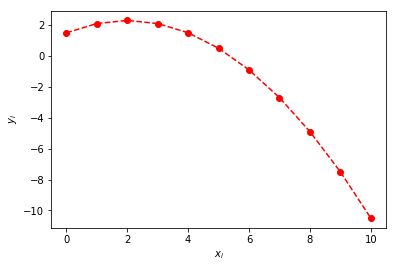

In [16]:
yi = wj[0] + wj[1]*xi + wj[2]*zi

fig, ax = plt.subplots()

ax.plot(xi, yi, '--or')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$y_i$')

This works, but we can create the same dataset using a Vandermonde matrix, which is a matrix of polynomials defined as:

$X_{ij} = x_i^{\: j}$

In other words, each column of the matrix consists of a different polynomial.

We can construct this matrix using `numpy`. First, we need to turn $x_i$ into a column vector:

In [18]:
print("x_i vector shape: {}".format(xi.shape))
#xi_col = xi.reshape((xi.shape[0], 1)) #<- here we "reshape" the matrix into a column
xi_col = xi.reshape(-1, 1) #<- this is equivalent, but less clear. It is a common shortcut.
print("x_i column shape: {}".format(xi_col.shape))

x_i vector shape: (11,)
x_i column shape: (11, 1)


Now, we can "stack" these vectors together to create the Vandermonde matrix:

In [19]:
xi = xi_col
X_vdm = np.hstack((xi**0, xi**1, xi**2))
X_vdm

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Next we can directly create $y_i$ using matrix-vector multiplication based on the definition of matrix-vector multiplication:

$\bar{\bar{X}}\vec{w} = \sum_j X_{ij}w_j = \sum_j x_i^{\:j} w_j = w_0x_i^0 + w_1x_i^1 + w_2x_i^2+ ... w_nx_i^n = w_0 + w_1x_i + x_2x_i^2 + ... w_nx_i^n$

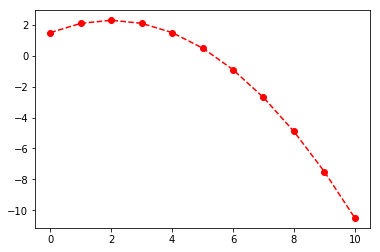

In [20]:
yi_vdm = X_vdm@wj

fig, ax = plt.subplots()

ax.plot(xi, yi_vdm, '--or')

We can verify that they are equal:

In [21]:
yi == yi_vdm

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Sometimes it is also useful to use `isclose` instead of `==` since numerical methods are prone to very small errors:

In [22]:
np.isclose(yi, yi_vdm)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

The `.all()` method is a good way to confirm that all values are equal:

In [23]:
M = np.isclose(yi, yi_vdm)
M.all()

True

### Exercise: Create your own Vandermonde matrix

## Norms, inner products, and orthogonality



Vectors can be described by various "norms" that capture their size and distance. The most common is the $L_2$ norm, also called the "Euclidean distance" which is defined as:

$||\vec{x}||_2 = \sqrt{\sum_i x_i^2}$

This can also be computed by taking the square root of the vector-vector "inner product" of a vector with itself:

$||\vec{x}||_2 = \sqrt{\vec{x}^T \vec{x}}$

A vector is called "normal" if it's norm is 1. We can always "normalize" a vector by dividing it by its norm:

In [24]:
col_0 = X_vdm[:,0]
norm_col_0 = np.linalg.norm(col_0,2)
col_0_normed = col_0/norm_col_0
print('Column norm: {}'.format(norm_col_0))
print('Normed column norm: {}'.format(np.linalg.norm(col_0_normed,2)))

Column norm: 3.3166247903554
Normed column norm: 1.0


We will also occasionally use the $L_1$ norm, defined as:

$||\vec{x}||_1 = \sum_i |x_i|$

These norms, and others are discussed in detail in the online notes of [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/notes/16_Linear_algebra/16_5_Norms.ipynb) and Lecture 3 of Trefethen & Bau.

It is also useful to remember that the inner product between two different vectors is equal to the product of their magnitudes and the cosine of the angle between them:

$\vec{x}^T\vec{y} = ||\vec{x}||_2 ||\vec{y}||_2 cos(\theta)$

This is described in detail in the online [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/notes/16_Linear_algebra/16_2_Vectors.ipynb) notes.

We can use this to compute the angle between two normed vectors:

In [25]:
col_1 = X_vdm[:,1]
norm_col_1 = np.linalg.norm(col_1,2)
col_1_normed = col_1/norm_col_1

cos_theta = np.dot(col_1_normed, col_0_normed)
theta = np.degrees(np.arccos(cos_theta))
theta

32.31153323742384

Vectors are defined as "orthogonal" if their inner product is zero. We can check that this is consistent with our typical definition of "orthogonal":

In [26]:
theta = np.degrees(np.arccos(0))
theta

90.0

In other words, orthogonal vectors are at right angles to each other, or have no projection onto each other.

One key concept that comes in handy is the ability to find the orthogonal components of an arbitrary set of vectors. We can do this by subtracting off the projection of one vector onto another:

In [27]:
col_1_ortho = col_1_normed - np.dot(col_0_normed, col_1_normed)*col_0_normed

np.dot(col_1_ortho, col_0_normed)

-6.938893903907228e-17

While this isn't technically zero, it is very close:

In [28]:
np.isclose(np.dot(col_1_ortho, col_0_normed), 0)

True

There is a discussion and proof of why this works for orthnormal vectors in Lecture 2 of Trefethen & Bau.

Let's take a look at the original vectors as compared to the orthonormal ones:

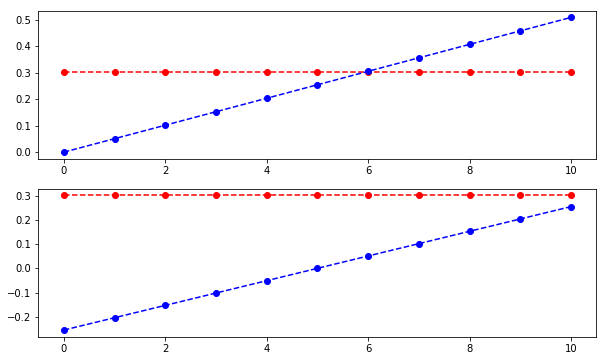

In [29]:
fig, axes = plt.subplots(2,1, figsize=(10,6))

axes[0].plot(xi, col_0_normed, '--or')
axes[0].plot(xi, col_1_normed, '--ob')

axes[1].plot(xi, col_0_normed, '--or')
axes[1].plot(xi, col_1_ortho, '--ob')

Note that these vectors don't appear to be at "right angles" to each other. Remember that these are not 2-dimensional vectors, but rather 10-dimensional vectors. Our intuition only goes so far when working in high-dimensional spaces!

### Exercise: Create an orthonormal version of the Vandermonde matrix

## Rank, Inverses, and Linear Systems

The concept of the "rank" of a matrix is important. The formal definition of rank is the "number of linearly independent columns/rows". For an $m \times n$ matrix, the rank is always less than or equal to the minimum of $m$ and $n$:

rank $\leq min(m, n)$

It is sometimes convenient to think of rank in terms of a linear system of equations defined by:

$\bar{\bar{A}}\vec{x} = \vec{b}$

where $\bar{\bar{A}}$ is an $m \times n$ matrix that defines equations in terms of unknown variables defined by $\vec{x}$. If $m = n$ then $\bar{\bar{A}}$ is square and the number of equations is equal to the number of unknowns. As long as there are no redundant equations, then the rank of $\bar{\bar{A}}$ is equal to $m$ and $n$. However, if there are redundant equations then the rank is equal to the number of non-redundant equations and the system is **underconstrained**. On the other hand, if $m > n$ then there are more equations than unknowns, and the system is **overconstrained** (assuming there are no redundant equations).

A matrix is **invertible** if and only if it is a square, full-rank matrix. This is equivalent to saying that a system of equations can only be solved ($\vec{x} = \bar{\bar{A}}^{-1}\vec{b}$) if the number of equations is equal to the number of unknowns (square matrix) and no equations are redundant (full-rank).

Let's look at an example based on the Vandermonde matrix and our dataset from before. We will use 3 points to extract the weights, $w_j$:

In [30]:
A = X_vdm[1:4, :]
b = yi[1:4]

print('Shape of A: {}'.format(A.shape))
print('Rank of A: {}'.format(np.linalg.matrix_rank(A)))

A_inv = np.linalg.inv(A)
w = A_inv@b

print('Weights: {}'.format(w))

Shape of A: (3, 3)
Rank of A: 3
Weights: [ 1.5  0.8 -0.2]


### Exercise: See how the rank changes if redundant equations are selected.

In practice, it is very inefficient to solve systems of equations with matrix inverses. You should be familiar with [Gaussian Elimination](http://mathworld.wolfram.com/GaussianElimination.html) from your linear algebra course. There are many other ways to solve linear systems, such as the QR factorization or using eigenvalues. Unfortunately we don't have time to cover these methods in this course, and will simply solve systems using the `solve` function from `numpy`:

In [31]:
w_solve = np.linalg.solve(A,b)
np.isclose(w_solve, w).all()

True

In this course, solving systems of equations is easy as long as (1) you can write the system in the form $\bar{\bar{A}}\vec{x} = \vec{b}$, and (2) the matrix $\bar{\bar{A}}$ is invertible (i.e. the system can be solved).

## Eigen and Singular Value Decompositions

The eigenvalue problem for a matrix $\bar{\bar{A}}$:

$\bar{\bar{A}} v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` function, and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [51]:
from numpy.linalg import eigvals, eig

print('Eigenvalues of A: {}'.format(eigvals(A)))

vals, vecs = eig(A)
print('Eigenvectors of A: {}'.format(vecs))

np.isclose(vals, eigvals(A))

Eigenvalues of A: [10.60311024  1.24543789  0.15145187]
Eigenvectors of A: [[-0.13772903 -0.81480675  0.65820453]
 [-0.43070617 -0.49754289 -0.7324674 ]
 [-0.89192091  0.29755844  0.17394918]]


array([ True,  True,  True])

The eigenvectors of a **symmetric** matrix will always be orthonormal:

In [54]:
A_sym = (A.T + A)/2. #make A symmetric
vals, vecs = eig(A_sym)

vec0 = vecs[:,0]
vec1 = vecs[:,1]
vec2 = vecs[:,2]

np.isclose(vec0@vec1,0)

True

Eigendecomposition is only possible for a square matrix. However, there is a similar concept called a "singular value decomposition", or SVD, that will work for any matrix:

$A = \hat{U}\hat{\Sigma}V^T$

In [58]:
from numpy.linalg import svd

vecsL, vals, vecsR = svd(A_sym)
np.isclose(vecsR[2,:], vecs[:,2])

array([ True,  True,  True])

For a square matrix, the SVD is equivalent to the eigendecomposition, although the order of the vectors will not always be the same. In general, eigenvalues and singular values are ordered from largest to smallest, but this is not guaranteed by the algorithms that compute them.

The advantage of the SVD is that it will also work for non-square matrices:

In [59]:
vecsL, vals, vecsR = svd(X_vdm)

print('Original matrix shape: {}'.format(X_vdm.shape))
print('Left singular vectors shape: {}'.format(vecsL.shape))
print('Right singular vectors shape: {}'.format(vecsR.shape))
print('Singular Values: {}'.format(vals))

Original matrix shape: (11, 3)
Left singular vectors shape: (11, 11)
Right singular vectors shape: (3, 3)
Singular Values: [160.3135455    5.20337928   1.22146387]


There is a more detailed discussion of the SVD in Lecture 4 of Trefethen & Bau. We will not study it directly in this course, but it is an important part of some algorithms that we will use.